<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Laboratorio de Visualización de Datos**


Tiempo Estimado Necesario: **45 a 60** minutos


En esta tarea usted se centrará en la visualización de los datos.

El conjunto de datos le será presentado en la de forma de una RDBMS (Sistema de Gestión de Bases de Datos Relacionales)

Tendrá que utilizar consultas en SQL para extraer los datos.


## Objetivos


En este laboratorio realizará lo siguiente:


-   Visualizar la distribución de los datos

-   Visualizar la relación entre dos características

-   Visualizar la composición de los datos

-   Visualizar la comparación de los datos


<hr>


## Demostración: Como trabajar con la base de datos


Descargar el archivo de base de datos


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-03-19 20:10:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.2’

m4_survey_data.sqli 100%[===================>]  34.98M  9.60MB/s    in 3.9s    

2021-03-19 20:10:44 (8.91 MB/s) - ‘m4_survey_data.sqlite.2’ saved [36679680/36679680]



Conectarse a la base de datos.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # abror una conexión con la base de datos

Importar el módulo pandas


In [3]:
import pandas as pd

## Demostración: Como ejecutar una consulta SQL


In [4]:
# imprimir cuantas filas hay en la tabla llamada 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# read_sql_query ejecuta la consulta sq1 y retorna los datos como dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demostración: Como listar todas las tablas


In [5]:
# imprimir todos los nombres de las tablas en la base de datos
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# read_sql_query ejecuta la consulta sq1 y retorna los datos como dataframe
tablas=pd.read_sql_query(QUERY,conn)
tablas

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demostración: Como ejecutar un grupo mediante una consulta


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demostración: Como describir una tabla


In [7]:
table_name = 'master'  # la tabla que desea describir 

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Manos a la Obra


## Visualizar la distribución de los datos


### Histogramas


Grafica un histograma de `ConvertedComp.`


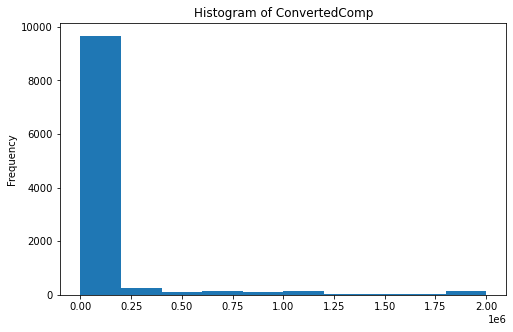

In [8]:
# su código va aquí
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# imprimir cuantas filas hay en la tabla llamada 'master'
QUERY = """
SELECT ConvertedComp
FROM master
"""

# read_sql_query ejecuta la consulta sq1 y retorna los datos como dataframe
df_1 = pd.read_sql_query(QUERY,conn)
df_1.head()

df_1['ConvertedComp'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of ConvertedComp') # añade un titulo al histograma
#plt.ylabel('Number of Countries') # añadir etiqueta de y
#plt.xlabel('Number of Immigrants') # añadir etiqueta de x

plt.show()

### Diagrama de Caja


Grafica un Diagrama de Caja de `Age.`


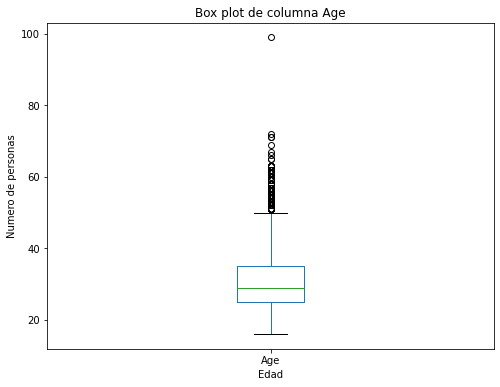

In [9]:
# su código va aquí
QUERY = """
SELECT Age
FROM master
"""
df_2 = pd.read_sql_query(QUERY,conn)
df_2.head()
df_2['Age'].plot(kind='box', figsize=(8,6))

plt.title('Box plot de columna Age')
plt.ylabel('Numero de personas')
plt.xlabel('Edad')


plt.show()

## Visualizar relaciones en los datos


### Diagrámas de Dispersión


Genera un Diagráma de Dispersión de `Age` y `WorkWeekHrs.`


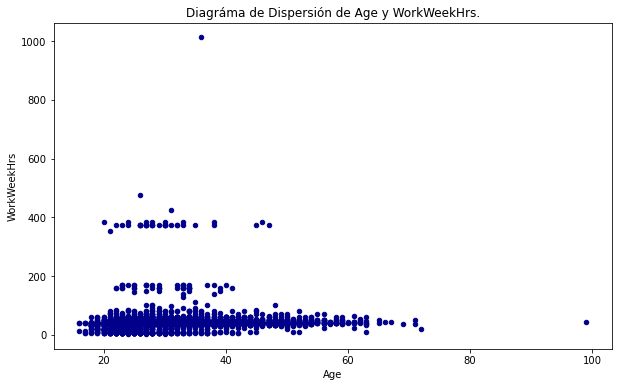

In [10]:
# su código va aquí
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df_3 = pd.read_sql_query(QUERY,conn)
df_3.head()

df_3.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 6), color='darkblue')

plt.title('Diagráma de Dispersión de Age y WorkWeekHrs.')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')

plt.show()

### Gráfico de Burbujas


Genera un Gráfico de Burbujas de `WorkWeekHrs` y `CodeRevHrs`, utilizar la columna `Age` como tamaño de la burbuja.


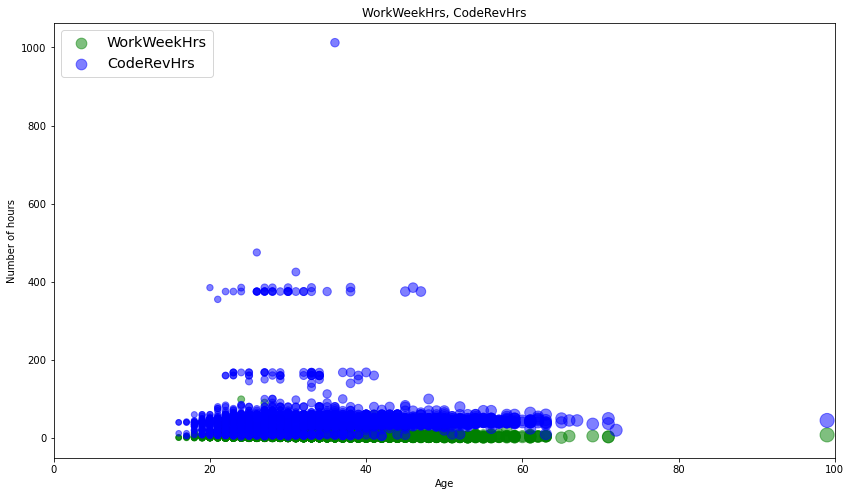

In [11]:
# su código va aquí

QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
df_4 = pd.read_sql_query(QUERY,conn)
df_4.head()

# WorkWeekHrs
ax0 = df_4.plot(kind='scatter',
                    x='Age',
                    y='CodeRevHrs',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparencia
                    color='green',
                    s=df_4['Age']*2,  # se puede multiplicar para aumentar el tamaño del circulo
                    xlim=(0,100)
                   )

# CodeRevHrs
ax1 = df_4.plot(kind='scatter',
                    x='Age',
                    y='WorkWeekHrs',
                    alpha=0.5,
                    color="blue",
                    s=df_4['Age']*2,
                    ax = ax0
                   )

ax0.set_ylabel('Number of hours')
ax0.set_title('WorkWeekHrs, CodeRevHrs')
ax0.legend(['WorkWeekHrs', 'CodeRevHrs'], loc='upper left', fontsize='x-large')

## Visualizar la Composición de los Datos


### Gráfico Circular


Genere un Gráfico Circular de las 5 primeras bases de datos sobre lo que los encuestados quieren aprender el próximo año. Etiquete el gráfico con los nombres de las bases de datos. Muestre los porcentajes de cada una en el gráfico.


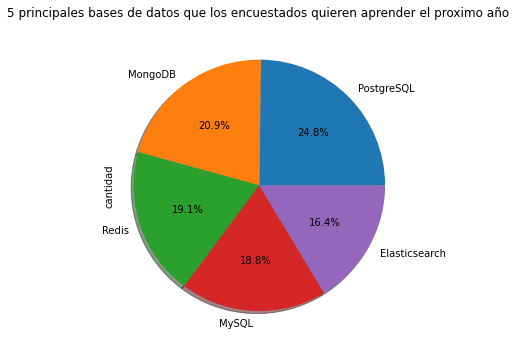

,ddny,cantidad
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


In [12]:
# su código va aquí   
QUERY= """SELECT DISTINCT DatabaseDesireNextYear AS ddny,COUNT(DatabaseDesireNextYear) AS cantidad FROM DatabaseDesireNextYear GROUP BY DatabaseDesireNextYear ORDER BY COUNT(DatabaseDesireNextYear) DESC"""
df_6=pd.read_sql_query(QUERY,conn)

# 5 primeros de la tabla
df_datos = df_6.loc[0:4] 
df_reset=df_datos.set_index('ddny')

df_reset['cantidad'].plot(kind='pie',figsize=(5, 6),autopct='%1.1f%%',shadow=True, subplots=True)

plt.title('5 principales bases de datos que los encuestados quieren aprender el proximo año')
plt.axis('equal') 

plt.show()

#LanguageWorkedWith
#LanguageDesireNextYear

QUERY= """SELECT DISTINCT DevType AS ddny,COUNT(DevType) AS cantidad FROM DevType GROUP BY DevType ORDER BY COUNT(DevType) DESC"""
df_6=pd.read_sql_query(QUERY,conn)

df_6_1=pd.read_sql_query(QUERY,conn)
df_6_1

### Gráficos Apilados


Genere un Gráfico Apilado de la mediana de `WorkWeekHrs` y `CodeRevHrs` para el grupo de edad entre 30 y 35


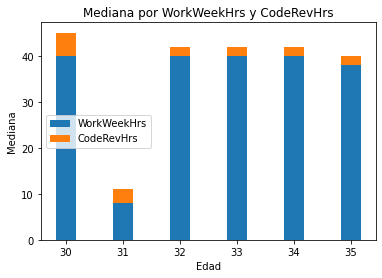

In [13]:
# su código va aquí
import numpy as np

QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master WHERE Age BETWEEN 30 AND 35 GROUP BY age
"""
df_7 = pd.read_sql_query(QUERY,conn)
df_7

labels = df_7['Age']
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(df_7['Age'], df_7['WorkWeekHrs'], width, label='WorkWeekHrs')
ax.bar(df_7['Age'], df_7['CodeRevHrs'], width, bottom=df_7['WorkWeekHrs'],
       label='CodeRevHrs')

ax.set_ylabel('Mediana')
ax.set_xlabel('Edad')
ax.set_title('Mediana por WorkWeekHrs y CodeRevHrs')
ax.legend()

plt.show()

## Visualización de la comparación de los datos


### Gráfico de Líneas


Dibuje un Gráfico de Líneas de la mediana de `ConvertedComp` para todas las edades entre 45 y 60.


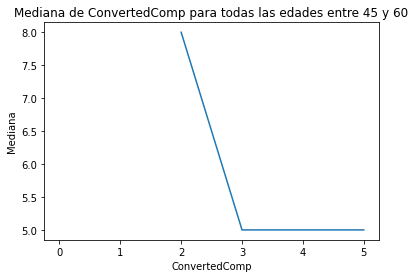

,CodeRevHrs,Age
0,5.0,25.0
1,NaN,26.0
2,8.0,27.0
3,5.0,28.0
4,5.0,29.0
5,5.0,30.0


In [14]:
# su código va aquí
QUERY = """
SELECT CodeRevHrs, Age
FROM master WHERE Age BETWEEN 25 AND 30 GROUP BY age
"""
df_8 = pd.read_sql_query(QUERY,conn)

df_8['CodeRevHrs'].plot(kind='line')

plt.title('Mediana de ConvertedComp para todas las edades entre 45 y 60')
plt.ylabel('Mediana')
plt.xlabel('ConvertedComp')

plt.show()
df_8

### Gráfica de Barras


Genere un Gráfica de Barras horizontales utilizando la columna `MainBranch.`


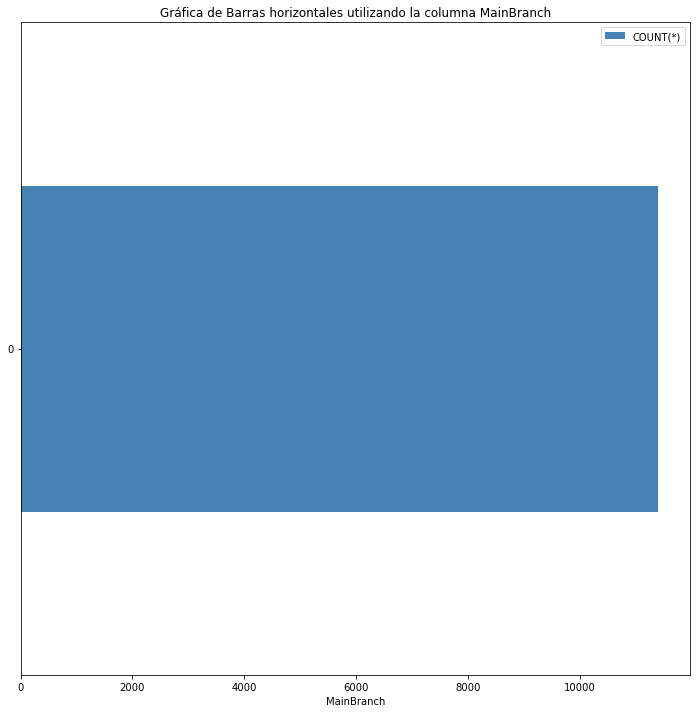

In [15]:
# su código va aquí
QUERY = """
SELECT MainBranch, COUNT(*)
FROM master
"""
df_9 = pd.read_sql_query(QUERY,conn)
df_9

df_9.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('MainBranch')
plt.title('Gráfica de Barras horizontales utilizando la columna MainBranch')
plt.show()



Cierre la conexión con la base de datos


In [16]:
conn.close()

## Autores


Ramesh Sannareddy


### Otros Colaboradores


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                |
| ----------------- | ------- | ----------------- | --------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Crear la versión inicial del lab. |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0121ES-Coursera-22673396&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0121ES-Coursera-22673396&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
